# Stock Market Analysis

A stock market represents the claims of companies and individuals on the shares of public companies. The prices of these shares vary depending on various factors, including inflation, demand, and reputation.

Buying and selling stocks is a major business, and people keep trying to predict the future stock behavior to earn large paybacks on their investments.

In this data analysis project, we try to analyze the data of various stocks to obtain valuable information. This information provides insights on which stocks generate more returns.

> **Note:** There is no program in the world that can correctly predict future stock behavior. The techniques covered in this project only allow us to make an educated guess based on the previous behavior of a particular stock.

**We will try to answer the following questions after doing stock market data analysis:**

1. How much did the stock price of each company change over time?

2. What were the daily returns for all the companies?

3. How are the stocks of the companies related to each other?

4. How much money do we risk losing by investing in a certain company?

5. Can we predict future stock behavior?

**Let’s look up the stocks data for Systems Ltd.**

In [1]:
import pandas as pd

sys = pd.read_csv('data/year_2018/SYS.csv')

sys.head()

,Time,Open,High,Low,Close,Volume
0,"Jan 1, 2018",75.50,75.5,75.00,75.00,4000
1,"Jan 2, 2018",74.85,76.0,73.11,75.32,197500
2,"Jan 3, 2018",74.03,74.6,72.30,72.75,21000
3,"Jan 4, 2018",71.03,74.5,71.03,74.01,381500
4,"Jan 5, 2018",74.35,77.0,71.00,76.52,180500


### Stocks data

The stock data for Systems Ltd, NETSOL, PTCL, and Avanceon for the year 2018 will be used for this analysis. Any stock data has six important columns.

   - **Time:** The date and time of the day
   - **Open:** The price of the stock at the start of the day when the market opens
   - **High:** The hightest price of the stock on that day
   - **Low:** The lowest price of the stock on that day
   - **Close:** The price of the stock at the end of the day when the market closes
   - **Volume:** The number of stocks traded that day

## Stock Price Trends

For this analysis, the column `Close` will be of great importance. As mentioned above, this column contains the closing price of the stock of each day. So, let's visualize this using a line graph how the closing price of **Systems Ltd** stock has varied throughout the year of 2018.

In [2]:
# Import essential module
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Time'>

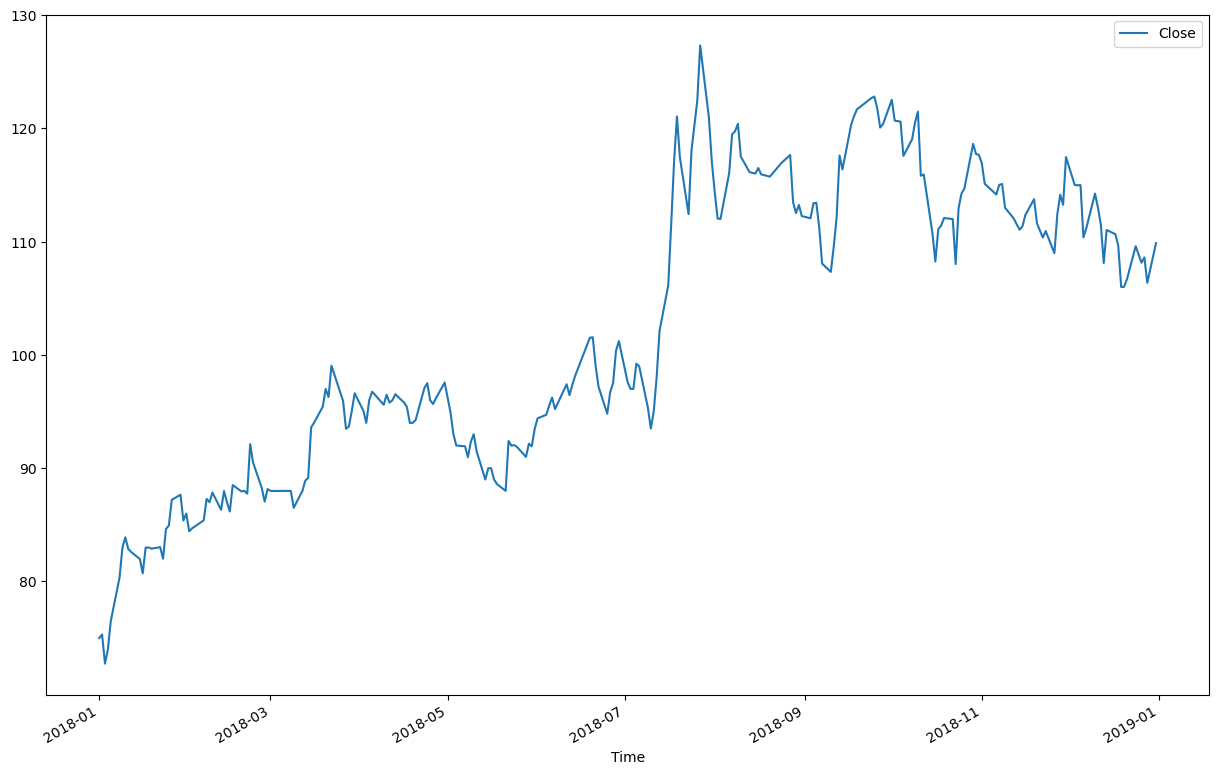

In [3]:
# Correct the format of date
sys['Time'] = pd.to_datetime(sys.Time)

# Set Time column as row index
sys = sys.set_index('Time')

# Line graph of Close column
sys['Close'].plot(legend=True, figsize=(15,10))

It can be seen that the stock price of **Systems Ltd** is generally increasing for the year 2018. The stock price at the end of the year is higher than the price at the start of the year.

### The trends of the other three companies:

In [4]:
# Import rest of companies stocks data
netsol = pd.read_csv('data/year_2018/NETSOL.csv')
ptc = pd.read_csv('data/year_2018/PTC.csv')
avn = pd.read_csv('data/year_2018/AVN.csv')

In [5]:
# Correct the format of date of three companies
netsol['Time'] = pd.to_datetime(netsol.Time)
ptc['Time'] = pd.to_datetime(ptc.Time)
avn['Time'] = pd.to_datetime(avn.Time)

# Set Time column as row index of three companies
netsol = netsol.set_index('Time')
ptc = ptc.set_index('Time')
avn = avn.set_index('Time')

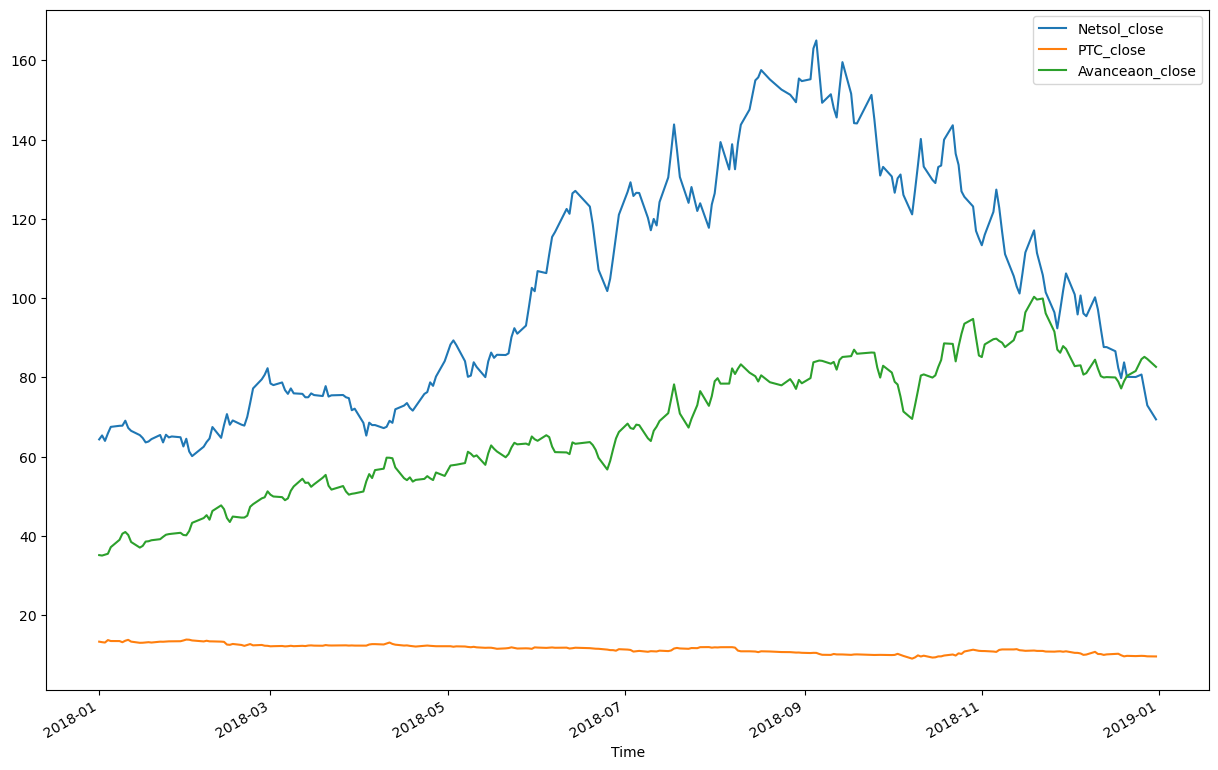

In [6]:
# Line graph of Close columns of three companies
netsol['Close'].plot(label='Netsol_close', figsize=(15,10))
ptc['Close'].plot(label='PTC_close', figsize=(15,10))
avn['Close'].plot(label='Avanceaon_close', figsize=(15,10))
plt.legend()
plt.show()

### Moving average

A moving average method is used to smooth the short term random price changes by filtering unnnecessary noise. As its name suggests, it takes a rolling average of moving average graph is plotted with information on the past prices; it is also called a trend indeicator.

The working of the moving average can be understood from the following image

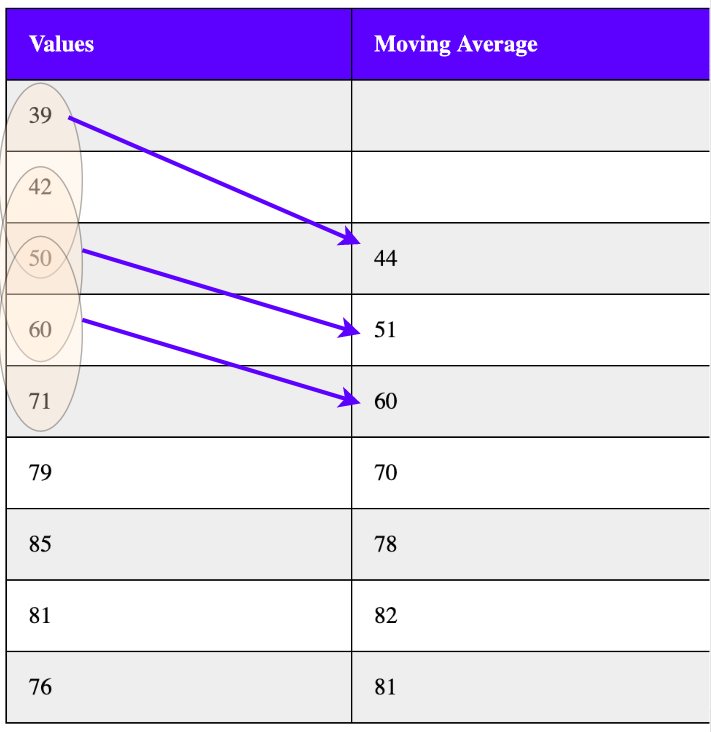

**Moving average with window size 3**

In [7]:
# Moving average window size 50
days = 50

# New column to store moving average values
col_name = "mv_avg for " + str(days) + " days"

# Calculating moving average
sys[col_name] = sys['Close'].rolling(days).mean()

sys.head()

,Open,High,Low,Close,Volume,mv_avg for 50 days
Time,,,,,,
2018-01-01,75.50,75.5,75.00,75.00,4000,NaN
2018-01-02,74.85,76.0,73.11,75.32,197500,NaN
2018-01-03,74.03,74.6,72.30,72.75,21000,NaN
2018-01-04,71.03,74.5,71.03,74.01,381500,NaN
2018-01-05,74.35,77.0,71.00,76.52,180500,NaN


<AxesSubplot:xlabel='Time'>

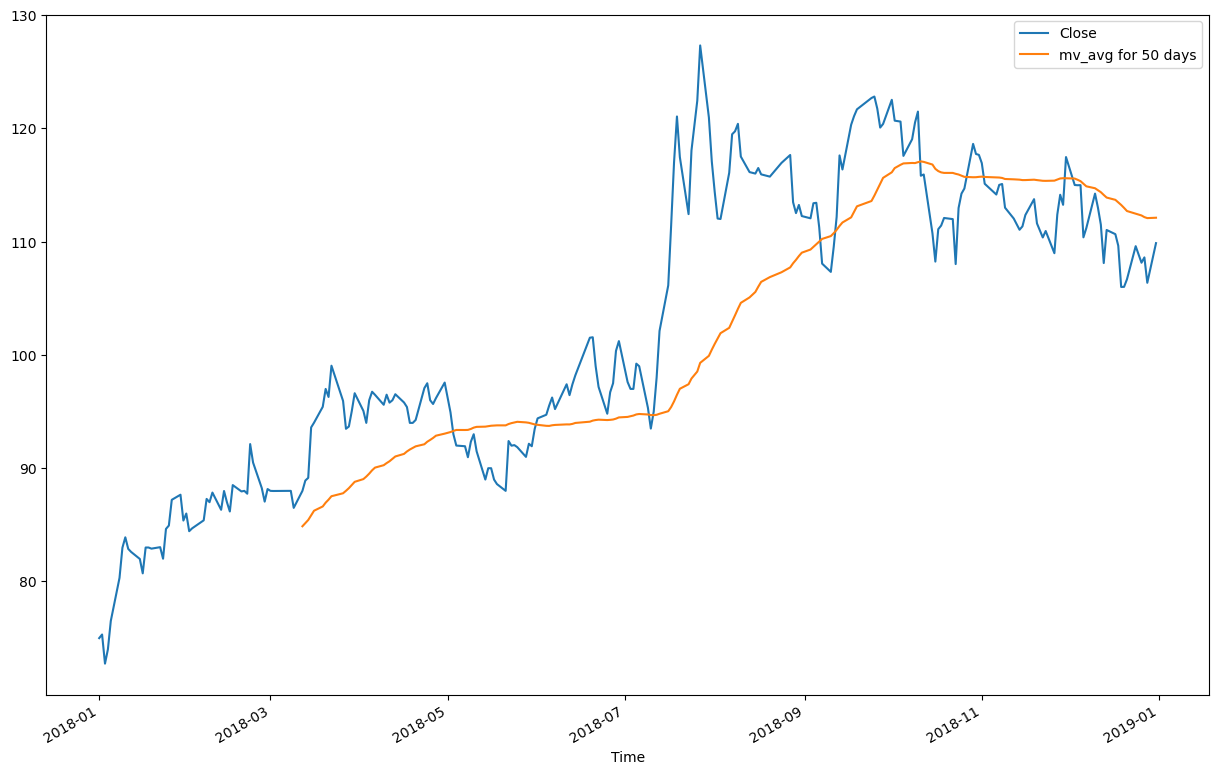

In [8]:
# Plotting the closing price with moving avarage for comprison
sys[['Close', 'mv_avg for 50 days']].plot(figsize=(15,10))


The output of the code snippet generates the above graph. The x-axis and y-axis represent the same values as before. It can be seen that, in the moving average graph, all the fluctuations are gone. A smooth curve represents the trend of stock behavior.

In the moving average, the length of the window or the number of days is of significant importance. A lower number of days highly sensitive to fluctuation changes, while a higher number of days is less sensitive to these changes.

> Keep in mind that less sensitivity offers more smooth curves. 

### Moving average comparisons

Let's visualize how lower and higher numbers of days affect the moving average curve.

In [9]:
# Multiple number of days
days = [10, 30, 60]

for day in days:
    col_name = "mv_avg for " + str(day) + " days"
    sys[col_name] = sys['Close'].rolling(day).mean()
    

<AxesSubplot:xlabel='Time'>

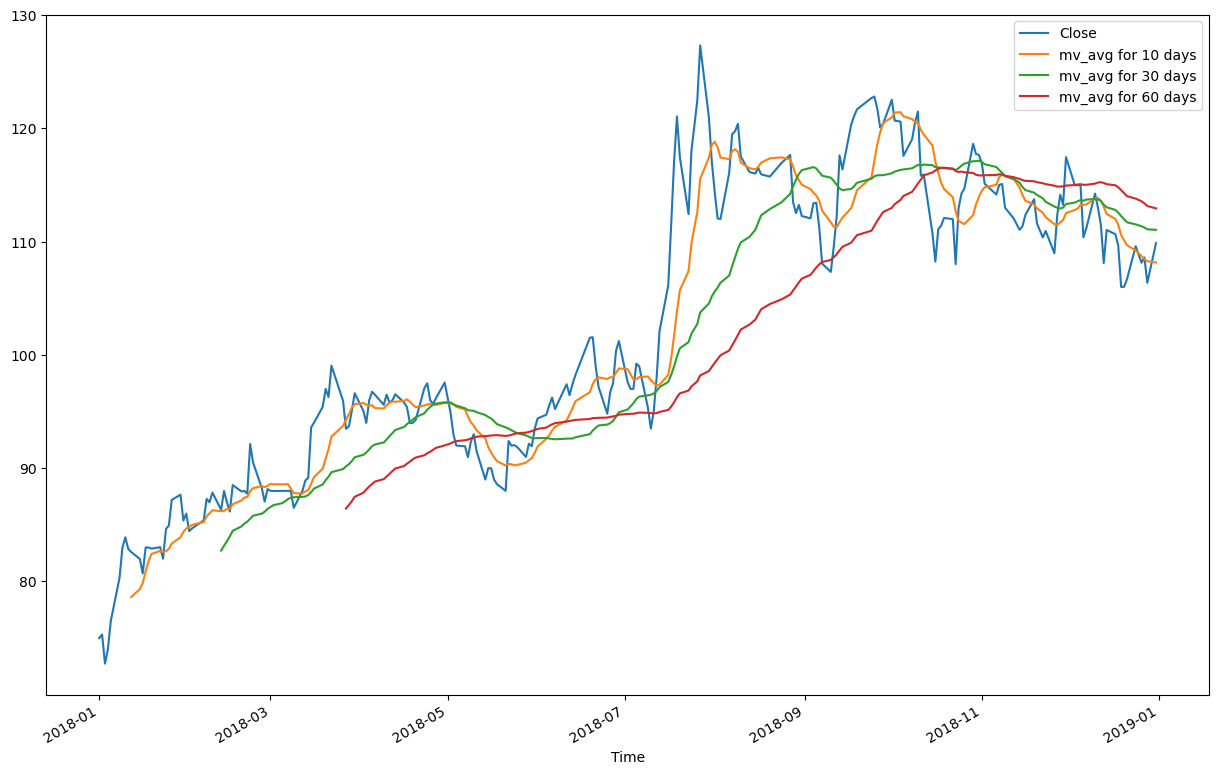

In [10]:
sys[['Close', 'mv_avg for 10 days', 'mv_avg for 30 days',
     'mv_avg for 60 days']].plot(subplots=False, figsize=(15,10))

The trends for different days are clearly plotted and separated by different colors. We can see that as the number of days increases the moving average curves give a better understanding of the stock trend than the regular plot. 

### Comparison

We can determine which of the four companies stocks did well for the year 2018 by plotting the closing prices of each company's stock. The follwing image shows this plot.

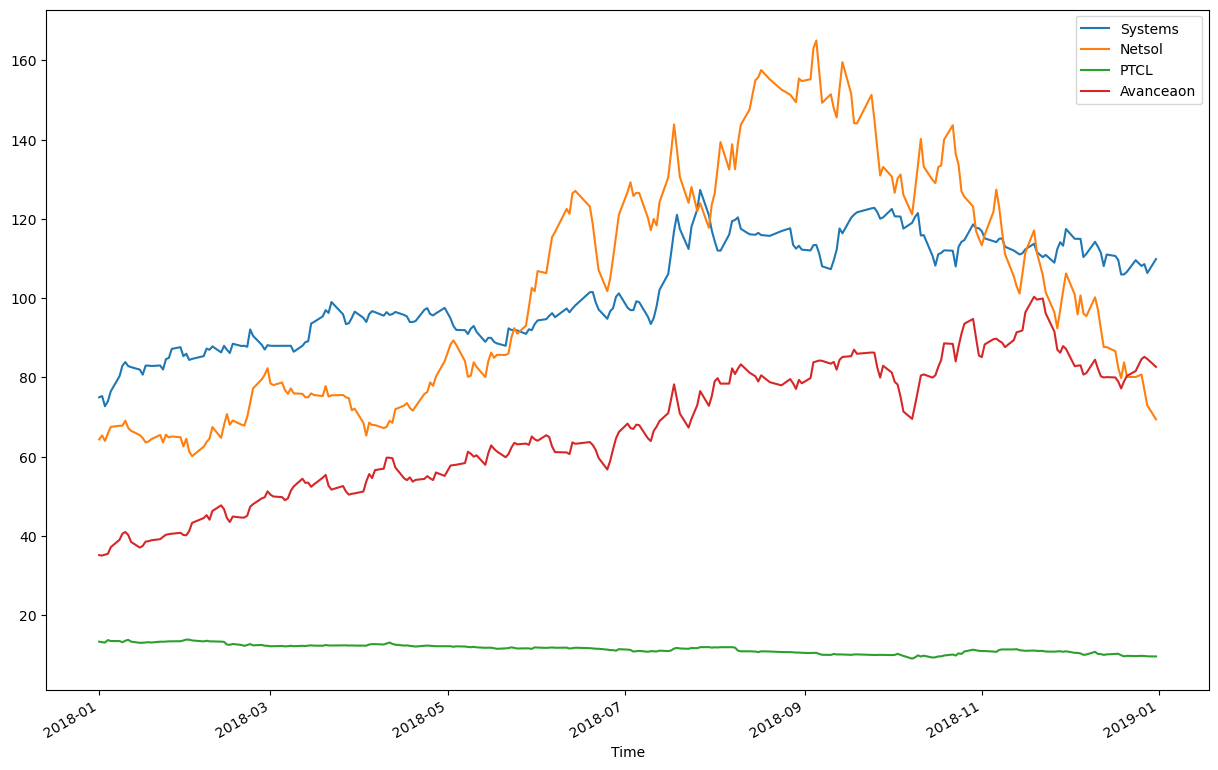

In [11]:
# Line graph of Close columns of four companies
sys['Close'].plot(label='Systems', figsize=(15,10))
netsol['Close'].plot(label='Netsol', figsize=(15,10))
ptc['Close'].plot(label='PTCL', figsize=(15,10))
avn['Close'].plot(label='Avanceaon', figsize=(15,10))
plt.legend()
plt.show()

It can be seen from the comparisons of the closing price of the four companies that 2018 was not a good year for **NETSOL** and **PTC**. The stocks of both **Systems Ltd** and **Avanceon** did pretty good and showed steady growth.

## Daily Returns

The price of stock changes on a daily basis. Daily return calculations tell us how much the current day stock value is differnt from the previous day stock value. A positive change indicates a rise in the value of the stock while a negative change indicates a fall in the stock. A stock with minimal positive or negative change is considered to be a stable and good stock.

### Calculating daily returns

\begin{equation*}
percent Change = \frac{Old Number-New Number}{Old Number} \times 100
\end{equation*}

We don't need steps for calculating the daily returns because `pandas` already provides a built-in function for it. The `pct_change` function is called from a Series objects, and it calculates the daily return for all rows based on the current and previous row value. This function returns a new `Series` with the calculated daily returns. The first row has no, or `NaN` value as there is no previous value for it.

<AxesSubplot:xlabel='Time', ylabel='Percentange Change'>

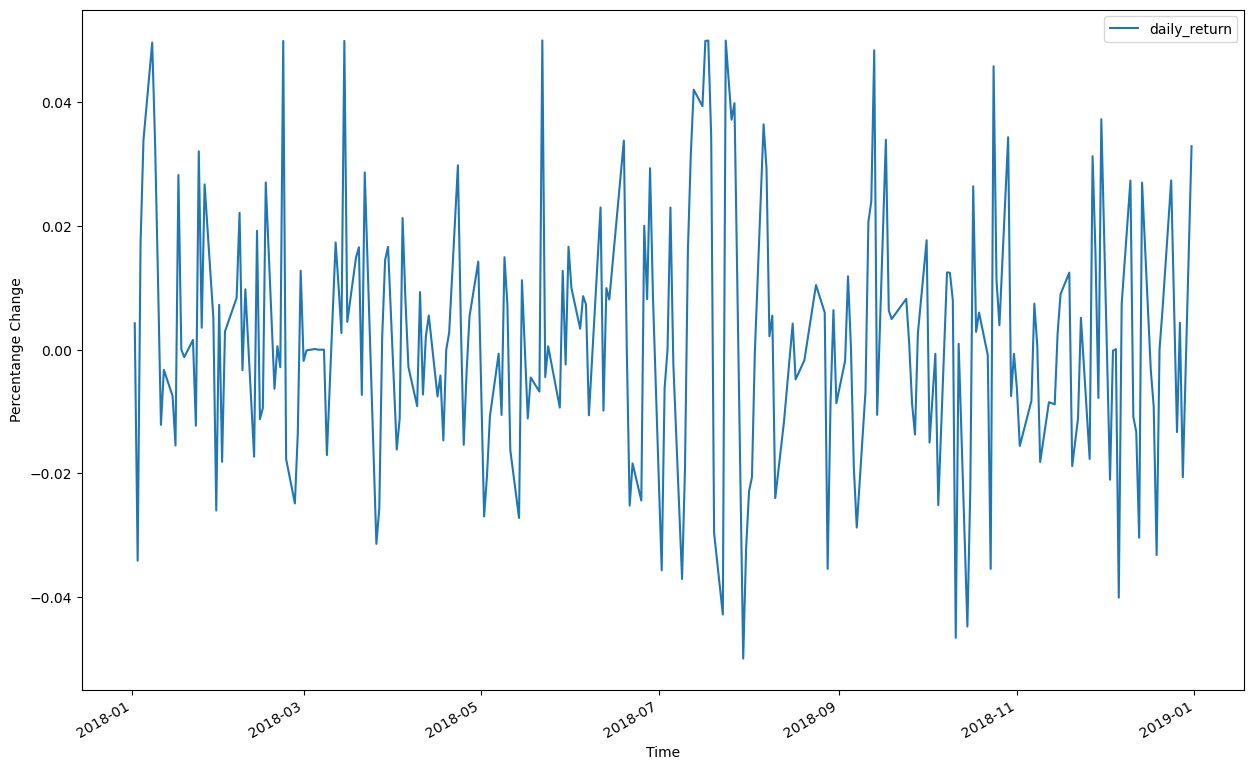

In [12]:
# Calculate the daily returns
daily_return = sys['Close'].pct_change()

# Create new column and assign daily return values to it
sys['daily_return'] = daily_return

# Assign a name to the y-axis of plot
plt.ylabel('Percentange Change')

# Plot the daily return values
sys['daily_return'].plot(legend=True, figsize=(15,10))

The output of the code snippet generates the above graph. The X-axis represents the time frames, and the y-axis represents the percentage change in daily stock values. It can be observed that the change in daily returns is between (-0.04%, 0.04%), which is not that big of a change.

As mentioned above, the stock with minimal change is considered a stable stock. So, the **Systems Ltd** stock is a good stock to hold according to the daily returns.

### Daily Returns of the other three companies: 

<AxesSubplot:xlabel='Time', ylabel='Percentange Change'>

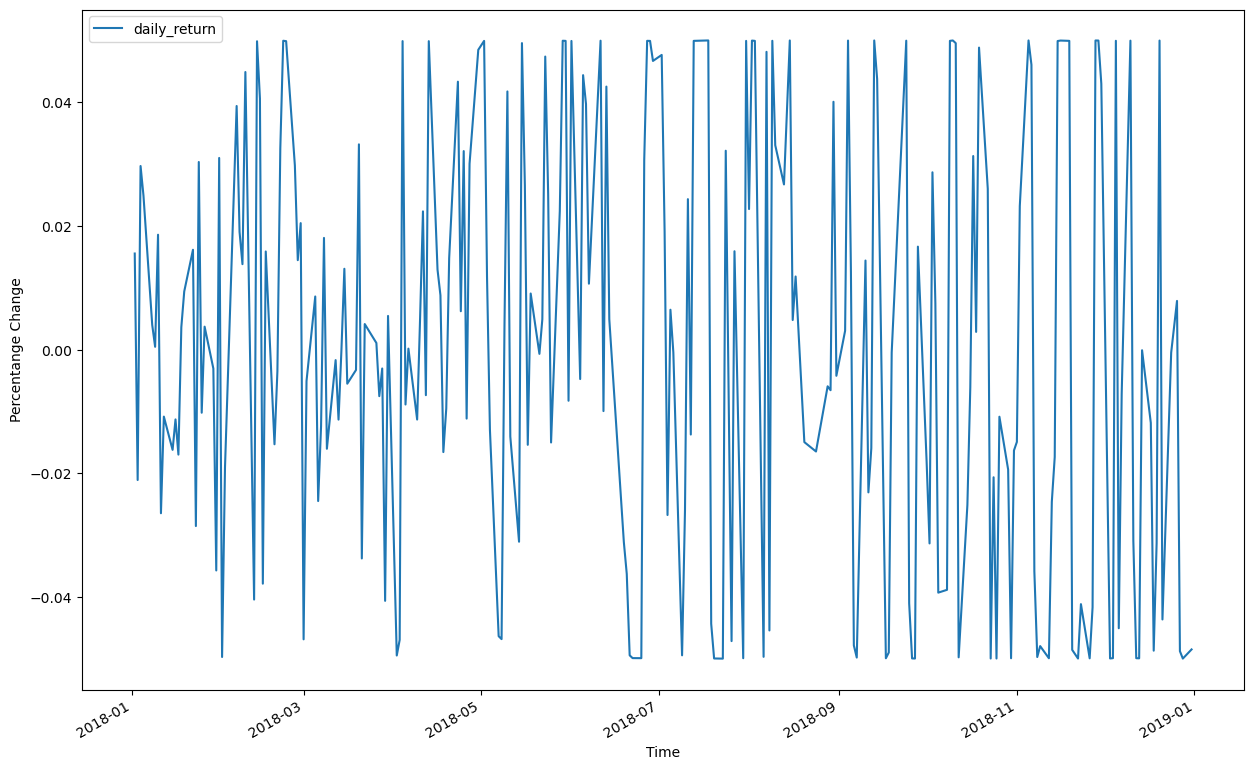

In [13]:
# Calculate the daily returns
daily_return = netsol['Close'].pct_change()

# Create new column and assign daily return values to it
netsol['daily_return'] = daily_return

# Assign a name to the y-axis of plot
plt.ylabel('Percentange Change')

# Plot the daily return values
netsol['daily_return'].plot(legend=True, figsize=(15,10))

<AxesSubplot:xlabel='Time', ylabel='Percentange Change'>

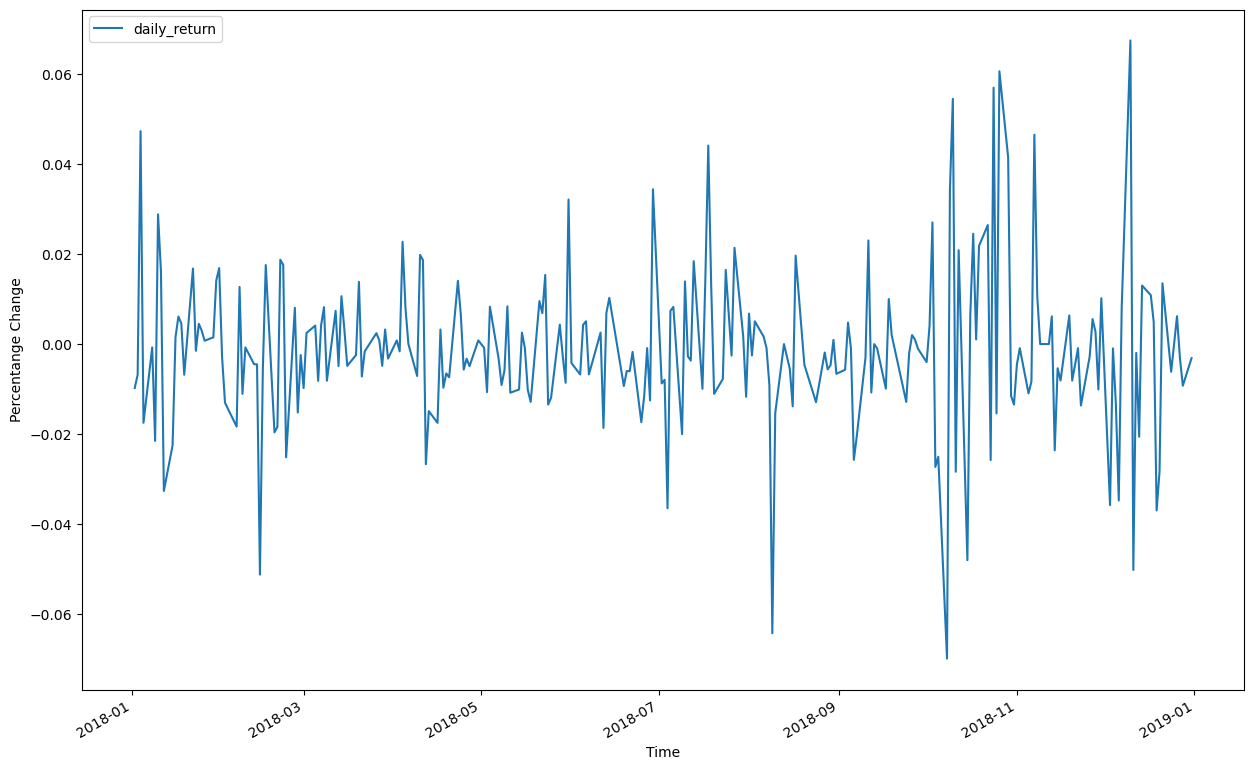

In [14]:
# Calculate the daily returns
daily_return = ptc['Close'].pct_change()

# Create new column and assign daily return values to it
ptc['daily_return'] = daily_return

# Assign a name to the y-axis of plot
plt.ylabel('Percentange Change')

# Plot the daily return values
ptc['daily_return'].plot(legend=True, figsize=(15,10))

<AxesSubplot:xlabel='Time', ylabel='Percentange Change'>

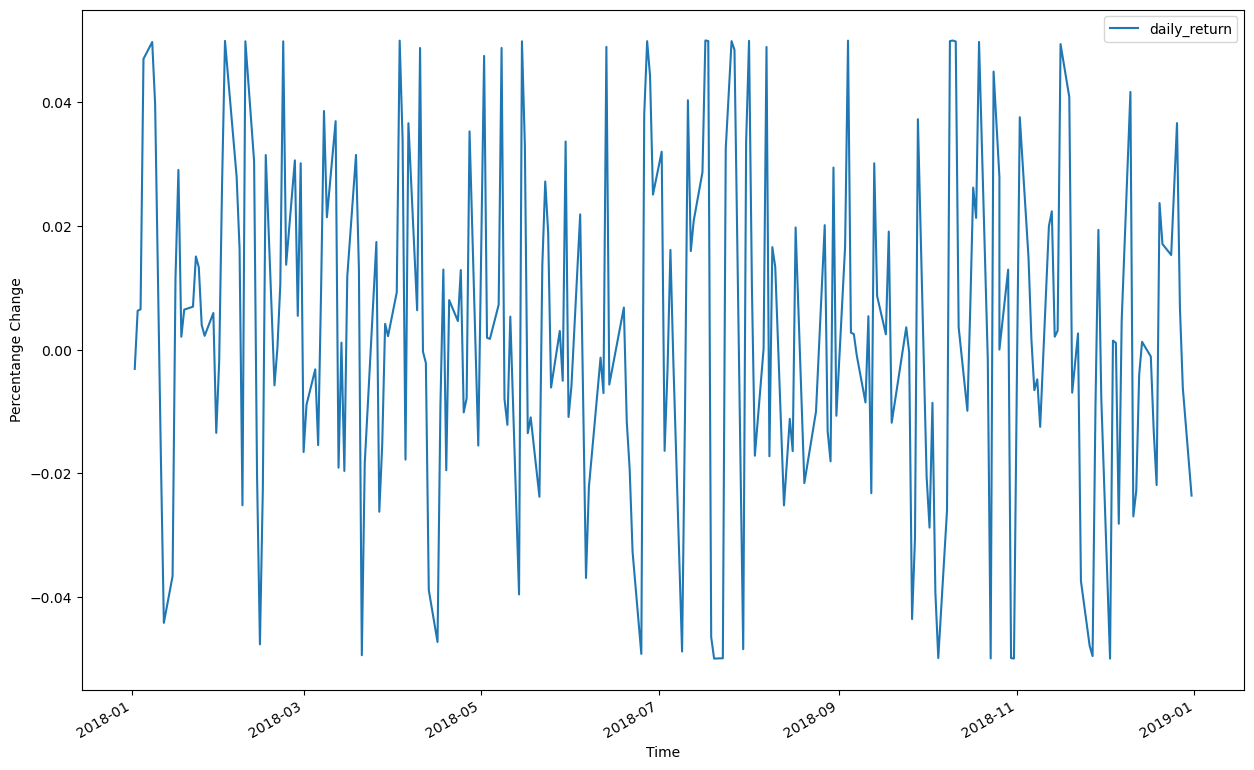

In [15]:
# Calculate the daily returns
daily_return = avn['Close'].pct_change()

# Create new column and assign daily return values to it
avn['daily_return'] = daily_return

# Assign a name to the y-axis of plot
plt.ylabel('Percentange Change')

# Plot the daily return values
avn['daily_return'].plot(legend=True, figsize=(15,10))

### Estimating daily return

Which daily return values are likely to occur using the probability density function can also be determined. This operation can easily be performed using the KDE plot.

The KDE (Kernel Density Estimation) plot plots the probability density function values on the y-axis with respect to the values of the x-axis. The histogram can be used to determine the amount of those likely occurring values by dividing them into continuous intervals. Let's visualize this with an example for better understanding.

In [16]:
import seaborn as sns

In [17]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='daily_return', ylabel='Probability Density Valus'>

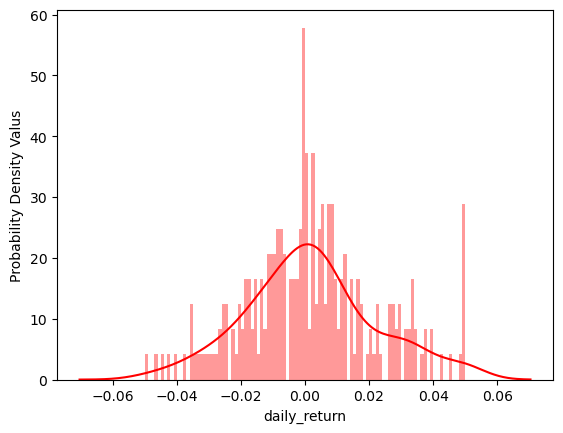

In [18]:
# Assign a name to the y-axis of plot
plt.ylabel('Probability Density Valus')

# Plots a distribution graph of KDE and histogram
sns.distplot(sys['daily_return'].dropna(), bins=100, color='red')

The `displot()` function is used to plot a KDE over a histogram. 

The x-axis has daily return values. The y-axis values represent how linkely the value on the x-axis occurs. The histogram shows how many values each of the one-hundred bins contain. The y-axis here doen not provide any information about the histogram.

The KDE plot informs us that most of the daily returns for **System Ltd** are close to **Zero**. This tells us that the changes in price of this stock are not drastic and we can assume that **System Ltd** has a stable stock.

### Estimating daily return of the other three companies:  

<AxesSubplot:xlabel='daily_return', ylabel='Probability Density Values'>

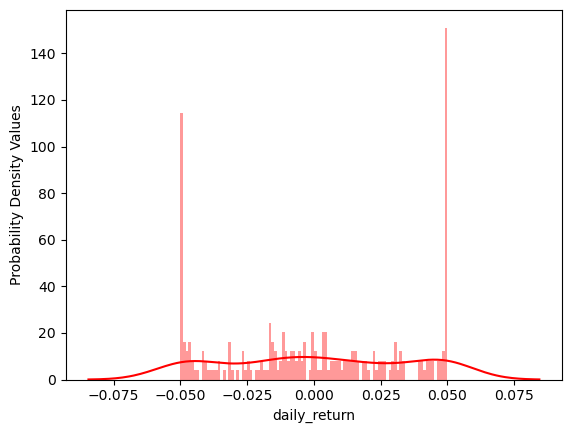

In [19]:
# Assign a name to the y-axis of plot
plt.ylabel('Probability Density Values')

# Plots a distribution graph of KDE and histogram
sns.distplot(netsol['daily_return'].dropna(), bins=100, color='red')

<AxesSubplot:xlabel='daily_return', ylabel='Probability Density Values'>

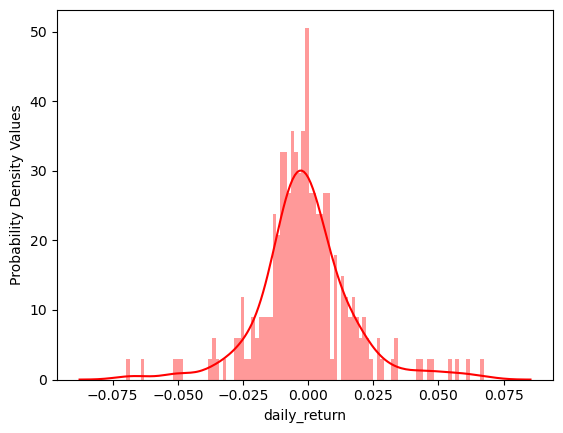

In [20]:
# Assign a name to the y-axis of plot
plt.ylabel('Probability Density Values')

# Plots a distribution graph of KDE and histogram
sns.distplot(ptc['daily_return'].dropna(), bins=100, color='red')

<AxesSubplot:xlabel='daily_return', ylabel='Probability Density Values'>

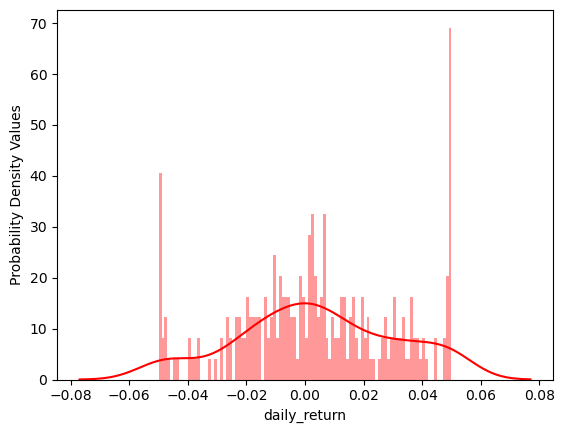

In [21]:
# Assign a name to the y-axis of plot
plt.ylabel('Probability Density Values')

# Plots a distribution graph of KDE and histogram
sns.distplot(avn['daily_return'].dropna(), bins=100, color='red')

## Correlation in Stocks

Correlation is a statistical technique that determines how strongly two variables are related to each other and how a change in one would affect the other. It can also be defined as a measure of dependense between two or more quantites.

The two types of correlation, in terms of stock behavior, can be described as follows:

   - **Positive correlation:** The stock value of one company goes up, and in correlation with it, the stock values of other companies also go up.
   
   - **Negative correlation:** The stock value of one company goes up, and in correlation with it, the stock values of the companies go down.

### Correlation score

For positive correlation, this score is between **0** and **1**, and for negative correlation, this score is between **-1** and **0** (inclusive). A strong correlation has a score above **0.4**. It is the same for the negative correlation; It's strong below a **-0.4** value. A score of **1** represents a perfect positive relationship and usually occurs when the correlation is taken with itself.

### Correlation with the closing price

The `corr()` function of a `DataFrame` can easily find correlations between its columns. So first, the closing prices of all companies need to be in one `DataFrame`, on which the `corr()` function will be applied.

In [22]:
# Creat a new data frame with all companies colsing price
df = pd.DataFrame({'SYS': sys['Close'], 
                   'NETSOL': netsol['Close'],
                   'PTC': ptc['Close'],
                   'AVN': avn['Close']})

df.head()

,SYS,NETSOL,PTC,AVN
Time,,,,
2018-01-01,75.00,64.38,13.34,35.18
2018-01-02,75.32,65.38,13.21,35.07
2018-01-03,72.75,64.00,13.12,35.29
2018-01-04,74.01,65.90,13.74,35.52
2018-01-05,76.52,67.54,13.50,37.19


In [23]:
# Calculating correlation after dropping null values
corr = (df.dropna()).corr()
corr

,SYS,NETSOL,PTC,AVN
SYS,1.000000,0.78341,-0.787943,0.901075
NETSOL,0.783410,1.00000,-0.703370,0.741200
PTC,-0.787943,-0.70337,1.000000,-0.844307
AVN,0.901075,0.74120,-0.844307,1.000000


The output shows that the correlation values of all the companies, with respect to the closing price, have been calculated against each other. Also, wecan observe that the correlation of the data of a company with itself is **1**. The values below zero represent nagative correlation, and the values above zero represent positive correlation. 

<AxesSubplot:>

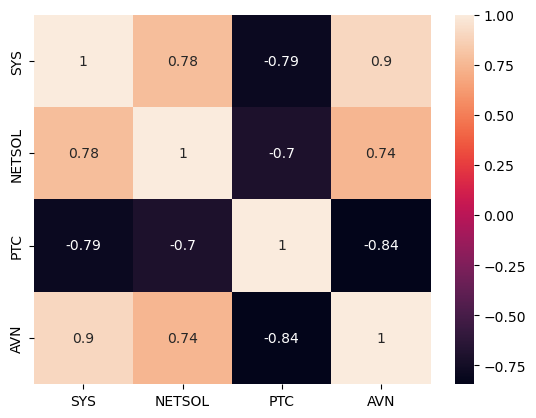

In [24]:
# Ploting heatmap
sns.heatmap(corr, annot=True)

### Correlation with daily returns

The same `corr()` function and technique are used here, but instead of the closing price the correlation is calculated on daily returns.

<AxesSubplot:>

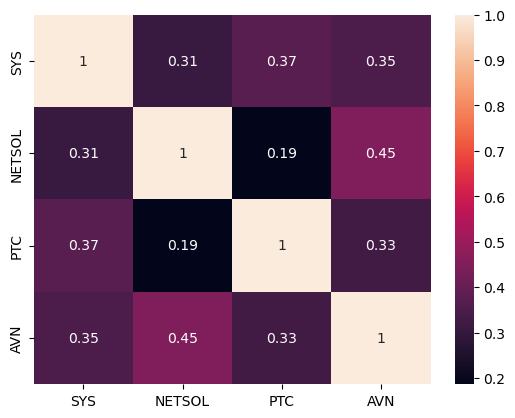

In [25]:
# Calculating daily returns of all companies closing price
all_returns = df.pct_change()

# Measuring correlation 
corr = (all_returns.dropna()).corr()

# Ploting heatmap
sns.heatmap(corr, annot=True)

From this correlation, we can infer that **NETSOL** and **Avanceon** are correlated in a positive way. Because the score is above **0.4**, it is a strong correlation.